In [1]:
import pandas as pd
import numpy as np
import json
path = '../dataset/FOOTBALL/football_15.json'
window_length = 5

In [2]:
import fasttext
from wordcloud import WordCloud
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))



In [3]:
with open(path) as f:
    data_json = json.load(f)

In [4]:
len(data_json)

257759

In [5]:
j = 0
for i in data_json.keys():
    if j>5:
        break
    j+=1
    print(data_json[i])

{'label': {'player': 'george blanda', 'position': 'QB', 'race': 'white', 'reference': 'george blanda', 'teams': ['houston_oilers', 'dallas_texans'], 'year': '1962'}, 'mention': ['center', 'in', 'houston', 'and', 'gus', 'grissom', 'is', 'teeing', 'up', 'the', 'ball', 'as', 'the', 'honorary', 'referee', 'shaky', '<player>', 'lander', 'will', 'kick', 'off', 'for', 'houston', 'these', 'teams', 'flip', 'this', 'year', 'dallas']}
{'label': {'player': 'dave grayson', 'position': 'DB', 'race': 'nonwhite', 'reference': 'grayson', 'teams': ['houston_oilers', 'dallas_texans'], 'year': '1962'}, 'mention': ['winning', 'here', 'in', 'houston', 'and', 'houston', 'beating', 'dallas', 'in', 'dallas', 'when', 'who', 'the', 'football', 'hey', 'and', 'james', 'is', '28', '<player>', 'is', '45', 'hitting', 'a', 'sideline', 'clara', 'were', 'waiting', 'the']}
{'label': {'player': 'dave grayson', 'position': 'DB', 'race': 'nonwhite', 'reference': 'grayson', 'teams': ['houston_oilers', 'dallas_texans'], 'year

In [6]:
df_lists = []
for i in data_json.keys():
    temp = []
    label = data_json[i]['label']
    temp.append(label['player'])
    temp.append(label['position'])
    temp.append(label['race'])
    temp.append(label['reference'])
    temp.append(label['teams'][0])
    temp.append(label['teams'][1])
    temp.append(label['year'])
    temp.append(data_json[i]['mention'])
    temp.append(' '.join(data_json[i]['mention']))
    df_lists.append(temp)

data_df = pd.DataFrame(df_lists, columns= ['Name', 'Position', 'Race', 'Reference', 'Team1', 
                                           'Team2', 'Year', 'Mention_tokens', 'Mention_text' ])

In [7]:
data_df.Race.unique()

array(['white', 'nonwhite'], dtype=object)

In [8]:
len(data_df)

257759

In [9]:
data_df = data_df.loc[data_df['Position']=='QB']

In [10]:
data_df.head()

,Name,Position,Race,Reference,Team1,Team2,Year,Mention_tokens,Mention_text
0,george blanda,QB,white,george blanda,houston_oilers,dallas_texans,1962,"[center, in, houston, and, gus, grissom, is, t...",center in houston and gus grissom is teeing up...
3,len dawson,QB,white,dawson,houston_oilers,dallas_texans,1962,"[a, dallas, first, down, on, their, 28th, they...",a dallas first down on their 28th they backfie...
8,len dawson,QB,white,dawson,houston_oilers,dallas_texans,1962,"[today, second, down, five, to, go, for, the, ...",today second down five to go for the dallas te...
10,len dawson,QB,white,dawson,houston_oilers,dallas_texans,1962,"[throws, quite, often, and, i, think, he, s, t...",throws quite often and i think he s thrown abo...
11,george blanda,QB,white,george blanda,houston_oilers,dallas_texans,1962,"[think, he, s, thrown, about, a, third, more, ...",think he s thrown about a third more passes th...


In [11]:
len(data_df)

71201

In [12]:
sum(data_df['Race']=='white')/(sum(data_df['Race']=='nonwhite')+sum(data_df['Race']=='white'))

0.7590483279729218

In [13]:
sub = sum(data_df['Race']=='nonwhite')
data_df = data_df.groupby('Race').apply(pd.DataFrame.sample, n=sub).reset_index(drop=True)

#### Check for missing Race information on players

In [14]:
data_df.head()

,Name,Position,Race,Reference,Team1,Team2,Year,Mention_tokens,Mention_text
0,lamar jackson,QB,nonwhite,lamar jackson,clemson,louisville,2015,"[beyond, <player>, who, will, have, a, short, ...",beyond <player> who will have a short gain on ...
1,jt barrett,QB,nonwhite,jt,michigan_state,ohio_state,2014,"[if, he, keeps, this, pace, up, and, he, s, nu...",if he keeps this pace up and he s numbers up y...
2,michael vick,QB,nonwhite,michael vick,atlanta_falcons,green_bay_packers,2002,"[return, of, the, dirty, bird, from, algae, <p...",return of the dirty bird from algae <player> o...
3,lamar jackson,QB,nonwhite,lamar jackson,clemson,louisville,2015,"[way, you, do, it, a, bunch, of, momentum, tow...",way you do it a bunch of momentum towards kent...
4,marcus mariota,QB,nonwhite,marcus mariota,oregon,stanford,2012,"[has, not, appeared, to, be, in, rhythm, so, f...",has not appeared to be in rhythm so far tonigh...


In [15]:
data_df.Race.isnull().values.any()

False

In [16]:
sum(data_df['Race']=='white')==sum(data_df['Race']=='nonwhite')

True

In [17]:
data_df.Race.isnull().sum()

0

No missing data

#### Wordclouds

In [18]:
import matplotlib.pyplot as plt

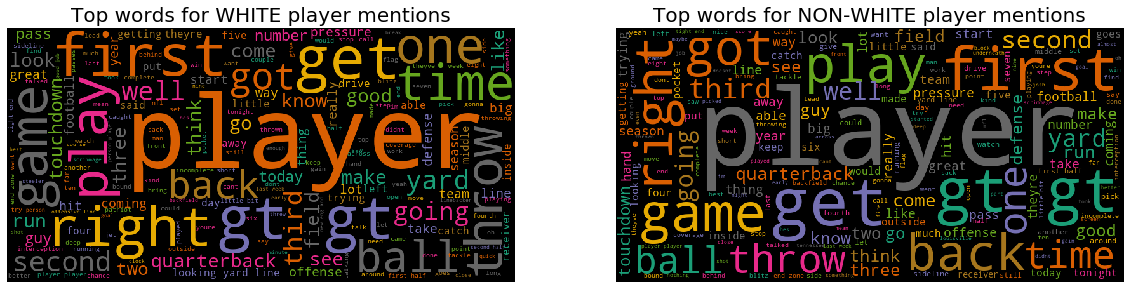

In [19]:
n_posts = 10000
whites = ' '.join(data_df[data_df['Race'] == 'white']['Mention_text'].str.lower().values[:n_posts])
nonwhites = ' '.join(data_df[data_df['Race'] == 'nonwhite']['Mention_text'].str.lower().values[:n_posts])

wordcloud_W = WordCloud(max_font_size=None, stopwords=stop,scale = 2,colormap = 'Dark2').generate(whites)
wordcloud_NW = WordCloud(max_font_size=None, stopwords=stop,scale = 2,colormap = 'Dark2').generate(nonwhites)

fig, ax = plt.subplots(1,2, figsize=(20, 5))
ax[0].imshow(wordcloud_W)
ax[0].set_title('Top words for WHITE player mentions',fontsize = 20)
ax[0].axis("off")

ax[1].imshow(wordcloud_NW)
ax[1].set_title('Top words for NON-WHITE player mentions',fontsize = 20)
ax[1].axis("off")

plt.show()

Wordclouds seem very similar - not much can be said visually

### Building a basic Naive Bayes model

In [20]:
data_df['label'] = data_df.Race.map({'white': 0, 'nonwhite': 1})

# preprocessing 

# lower casing all letters 
data_df['Mention_text'] = data_df.Mention_text.map(lambda x: x.lower())

# removing punctuation
data_df['Mention_text'] = data_df.Mention_text.str.replace('[^\w\s]', '')

In [21]:
sum(data_df['label']==0)

17156

In [22]:
sum(data_df['label']==1)

17156

In [23]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_df['Mention_text'], data_df['label'], test_size=0.2, rando
                                                    
                                                    m_state=42)

In [24]:
X_train

25597    part has been missing this year come back in t...
31384    would get a run after left guard gtgt and play...
8037     and just rip dunk right now in the face of a s...
19130    have been notoriously crum worse now theyre ge...
9831     new orleans saints and he comes up with the 65...
                               ...                        
16850    second and goal with under a minute to play in...
6265     fan lead in player yards so far this season ab...
11284    beaten anybody who s all that good to be hones...
860      down ten penalty of the game on the 46 now of ...
15795    pressure forces the quick pressure forcesplaye...
Name: Mention_text, Length: 27449, dtype: object

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
train_tf = vect.fit_transform(X_train)
test_tf = vect.transform(X_test)

In [29]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='saga', random_state=42, C=5, penalty='l2',max_iter=100).fit(train_tf, y_train)

In [35]:
print(model.coef_[0])

[-0.12804382 -0.95732069 -1.13302575 ...  0.35032571  0.41192083
 -0.45491749]


In [34]:
len(model.coef_[0])

21738

In [32]:
len(vect.get_feature_names())

21738

In [ ]:
for x in 

In [36]:
Z = [x for _,x in sorted(zip(model.coef_[0],vect.get_feature_names()))]

In [40]:
Z[:20]

['pittsburgh',
 'mcdaniels',
 'simeon',
 'bengals',
 'gators',
 'rodgers',
 'usc',
 'purdue',
 'iowa',
 'lenny',
 'biscay',
 'warm',
 'burger',
 'cincinnati',
 'phillip',
 'miami',
 'dolphins',
 'denver',
 'broncos',
 'steelers']

In [44]:
predicted = model.predict(test_tf)

In [45]:
wrong_positive_inds = np.where((y_test == 1) & (predicted != y_test))[0]
wrong_negative_inds = np.where((y_test == 0) & (predicted != y_test))[0]

In [49]:
wrong_pos_exs = []
for x in wrong_positive_inds:
    if len(wrong_pos_exs)<50:
        wrong_pos_exs.append(data_df['Mention_text'][x])
wrong_pos_exs

['to prepare for just a little ironic dont you think yeah here s player wind in a footrace towards a pylon he s in muscles his way for a',
 'nohitter but there was something about football and even though his dad was initially skeptical insisted he was going to be a quarterback that same senior season at white',
 'just one of those guys that when the stakes get higher he gets better and takes off breaks a tackle puts the foot of the ground off the takes',
 'time hit by the quarterback player the night for the buckeyes 1311 empty backfield for a lot of movement again player and we mentioned it the only true road',
 'block the backside so if we take a look at something out develops from our comes that he expects his backside to be protected hit contini going out to',
 'everything was going against them they rallied to win that one there is the perfect not a good catch on the ball targets it s very close to a',
 'the career high forplayerasplayerjust had it lofted right to him perfect mat

In [ ]:
# first without stemming
# from nltk.stem import PorterStemmer

# stemmer = PorterStemmer()

# Vectorization
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
counts = count_vect.fit_transform(data_df['Mention_text'])

In [ ]:
# TFIDF
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer().fit(counts)

counts_tfidf = transformer.transform(counts)

In [ ]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(counts_tfidf, data_df['label'], test_size=0.2, random_state=42)

In [ ]:
y_train

In [ ]:
# training the Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# model = XGBClassifier(subsample=0.5, max_depth=24).fit(X_train, y_train)
# model = GradientBoostingClassifier(n_estimators=1, min_samples_split=10, max_depth=15, 
#                                    min_samples_leaf=1, max_features='log2').fit(X_train, y_train)

# model = DecisionTreeClassifier(criterion='entropy', max_depth=150, min_impurity_decrease=0.000007).fit(X_train, y_train)

# model = AdaBoostClassifier(n_estimators=10).fit(X_train, y_train)
# model = RandomForestClassifier(n_estimators=10, min_samples_split=10, max_depth=10, 
#                                min_samples_leaf=1, max_features='log2').fit(X_train, y_train)

# model = MultinomialNB().fit(X_train, y_train)
model = LogisticRegression(solver='saga', random_state=42, C=5, penalty='l2',max_iter=100).fit(X_train, y_train)


In [ ]:
# from sklearn.ensemble import VotingClassifier
# estimators = [('logistic', LogisticRegression(solver='saga', random_state=42, C=5, penalty='l2',max_iter=100)),
#              ('decision_tree', DecisionTreeClassifier(criterion='entropy', max_depth=300))]
# model = VotingClassifier(estimators, voting='hard').fit(X_train, y_train)


In [ ]:
print(model)

In [ ]:
print("TRAIN: ", model.score(X_train, y_train))
print("TEST: ", model.score(X_test, y_test))

In [ ]:
import numpy as np

predicted = model.predict(X_test)

# acc_dict[window_length] = np.mean(predicted == y_test)
print(np.mean(predicted == y_test))

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score
# f_dict[window_length] = f1_score(y_test, predicted, average='macro')
print(f1_score(y_test, predicted, average='macro'))

In [ ]:
print(precision_score(y_test, predicted))

In [ ]:
print(recall_score(y_test, predicted))

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
print(confusion_matrix(y_test, predicted))

plot_confusion_matrix(model, X_test, y_test, values_format='d')  # doctest: +SKIP
plt.show() 

In [ ]:
from sklearn.metrics import classification_report
labs = [1, 0]
targs = ['Non White', 'White']
print(classification_report(y_test, predicted, labels=labs, target_names=targs))

In [ ]:
def evaluation_metric(true, pred):
  # weight the perclass accuracy by the inverse of their frequency
    frac_propaganda = np.sum(true)/len(true)
    wp = 1/frac_propaganda  
    wnp = 1/(1-frac_propaganda)

    num = (wp * np.sum(np.logical_and(true, pred).astype(int))) + (wnp * np.sum(np.logical_and(1-true, 1-pred).astype(int)))
    den = (wp*np.sum(true))+(wnp*np.sum(1-true))
    weighted_accuracy = num/den
    return weighted_accuracy
evaluation_metric(y_test, predicted)

In [ ]:
model.predict_proba(X_test)

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from lime import lime_text
# from sklearn.pipeline import make_pipeline
# vectorizer = TfidfVectorizer()

# X_train, X_test, y_train, y_test = train_test_split(data_df['Mention_text'], data_df['label'], test_size=0.2, random_state=42)

# train_vecs = vectorizer.fit_transform(X_train)
# test_vecs = vectorizer.transform(X_test)
# c = make_pipeline(vectorizer, model)



In [ ]:
# X_test = X_test.reset_index(drop=True)

In [ ]:
# print(c.predict_proba(X_test[0]))

In [ ]:
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'soc.religion.christian']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories)
class_names = ['atheism', 'christian']

In [ ]:
df_lists = []
for i in data_json.keys():
    temp = []
    label = data_json[i]['label']
    temp.append(label['player'])
    temp.append(label['position'])
    temp.append(label['race'])
    temp.append(label['reference'])
    temp.append(label['teams'][0])
    temp.append(label['teams'][1])
    temp.append(label['year'])
    temp.append(data_json[i]['mention'])
    temp.append(' '.join(data_json[i]['mention']))
    df_lists.append(temp)

data_df = pd.DataFrame(df_lists, columns= ['Name', 'Position', 'Race', 'Reference', 'Team1', 
                                           'Team2', 'Year', 'Mention_tokens', 'Mention_text' ])

In [ ]:
model

In [ ]:
model.predict(transformer.transform(count_vect.transform(['He is very lazy'])))